# E-COMMERCE DATA SCIENTIST
- Nama: **Muhammad Rafly**
- Email: **mhmdrafly10@gmail.com**
- Id Dicoding: **muhammad_rafly10**

## Menentukan Pertanyaan Bisnis



1.  Berdasarkan Letak Geografis, dimana saja letak pelanggan terbanyak ?
2.  Berdasarkan dari data, Produk apa saja yang merupakan produk terlaris dan kurang laris ?
3.  Bagaimana tingkat kepuasan pelanggan dari berdasarkan dari data ?

## **Siapkan Data Library yang Dibutuhkan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import streamlit as st
import urllib
from func import DataAnalyzer, BrazilMapPlotter
from babel.numbers import format_currency

## **1. Data Wrangling**

### 1.A Gathering Data

In [ ]:
# Direktori yang berisi file CSV
data_dir = "drive/RaflyDrive/data/"

# membuka kumpulan data satu per satu (mengabaikan pelanggan dan penjual)
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 1.B Assessing Data

1.B.1 Memeriksa Semua Tipe Data

In [ ]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [ ]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_oo:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  data['items'][column] = pd.to_datetime(data['items'][column])

datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

1.B.2 Memeriksa Duplikasi

In [ ]:
# Inisialisasi kamus untuk menyimpan jumlah duplikat dan jumlah sampel total
duplicate_counts = {}
total_sample_counts = {}

# Hitung dan simpan jumlah duplikat dan jumlah sampel total untuk setiap DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Hitung jumlah total sampel

# Buat Bingkai Data dari kamus
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Gabungkan kedua DataFrame dengan menggabungkannya secara horizontal
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geo,1000163,261831
category,71,0


1.B.3 Memeriksa Nilai yang Hilang

In [ ]:
# Inisialisasi kamus untuk menyimpan jumlah nilai nol untuk setiap Bingkai Data
null_counts = {}

# Hitung dan simpan jumlah nilai nol untuk setiap Bingkai Data
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

### **1.C Pembersihan Data**

1.C.1 Pemesanan



*   Ini adalah kumpulan data yang paling penting karena seperti tabel penghubung, dan terhubung ke banyak kumpulan data lainnya berdasarkan order_id.



In [ ]:
# tujuan analisis ini akan memilih hanya pesanan yang sudah benar-benar terkirim
print(data['orders']['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


In [ ]:
print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Hanya menerima pesanan yang dikirim, mendapatkan 97,02% data

In [ ]:
# pertama mendapatkan semua order_id di mana status pesanan terkirim
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# sekarang filter setiap kerangka data lainnya di mana order_id adalah kunci asing
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

In [ ]:
# memeriksa nans disetiap dataset
for key, value in data.items():
    for col in value.columns:
        # cetak hanya nama kolom yang terdapat nans
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [ ]:
# menentukan pesanan nans
# Yang diperlukan yaitu delivered_customer_date.
print('There are only ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders that are missing delivery dates.')

Hanya ada 8 pesanan yang tanggal pengirimannya hilang.

In [ ]:
# pertama mendapatkan semua order_id dimana status pesanan terkirim
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# sekarang filter setiap kerangka data lainnya di mana order_id adalah kunci asing
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

In [ ]:
# Tidak tertarik dengan tanggal pengiriman sebenarnya, tetapi lebih tertarik jika dikirimkan tepat waktu
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

1.C.2 Ulasan

In [ ]:
print('Review cols: ' , data['reviews'].columns.values)

# kolom review_comment_title 88% NaN jadi saya hapus saja.
# TODO: nans untuk review berarti tidak ada (?).
# Jadi mungkin anggap saja hanya itu yang ada dan gunakan data secara terpisah untuk analisis etxt (dalam M3) ENDTODO

# dan kapan ulasan dikirim ke pelanggan
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [ ]:
# untuk saat ini saya tidak akan melakukan analisis teks apa pun jadi saya tidak terlalu tertarik dengan pesan komentar
#sepertinya di kolom ini ada nan kalau orang tidak meninggalkan review
# Saya tidak mau menghilangkan kolomnya, jadi saya ganti saja nan dengan 0 dan review dengan 1
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

1.C.3 Produk

In [ ]:
print('Product cols: ' , data['products'].columns.values)

## Saya sudah memutuskan tidak tertarik dengan nama yang panjang atau deskripsi produk (terlalu banyak nans)
# juga Saya tidak memikirkan hubungannya dengan atribut ukuran setiap produk
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [ ]:
# setelah melihat daftar besar kategori produk
# Saya pikir aman untuk berasumsi bahwa saya dapat mengganti nans di kolom ini dengan 'lainnya'
data['products']['product_category_name'].fillna(value='outro', inplace=True)

In [ ]:
# di kolom photos_qty tidak ada angka nol, entah kenapa saya ragu TIDAK ada produk yang fotonya nol
# akan mengisi nans dengan nol pada kolom ini
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

1.C.4 Geo

In [ ]:
# hapus data duplikat
data['geo'].drop_duplicates(inplace=True)

## **2. Exploratory Data Analysis (EDA)**

### 2.A Mencari Pelanggan

In [ ]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
72297,4219fc0a46a049c6090d77dc8fd20927,0795aec8f109d675adec20dc0023cfe4,8215,sao paulo,SP
3303,141f5670b7004a1251c9d0b45688fbfb,917d32872d3c7bbe96ed074c67c30f28,14025,ribeirao preto,SP
94793,14c720f7ac4e21376dd311697d40175a,999e500fcd3619146877edbebccab429,38182,araxa,MG
15879,c56032bb1f28ae631c26e3c83a1d80a7,288bffdb3e3373c0813f6ce3e1f85bfa,4462,sao paulo,SP
75725,60a54af65a5a4a0c2f348e937937e9aa,85fc7cb0076a2139134cd87b2e54de45,36050,juiz de fora,MG


In [ ]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### 2.B Mencari Pembayaran

In [ ]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
53157,e9ad1ed9661164dc90b941c5389f67bd,1,credit_card,2,72.15
92322,cd4828e8be3a0d85aa38a986e0f4db6c,1,credit_card,1,36.69
46769,ed530e8c3450732950ed6d49e2cf20eb,1,credit_card,2,124.88
99692,2b27a6490066b855ca14a5f5e0406807,1,credit_card,2,38.25
32144,69340678ddc4f528cc879efbebd9b4e2,1,credit_card,6,142.98


In [ ]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

### 2.C Mencari Pesanan

In [ ]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
3035,3f0c7e7bedf15ae58cd1c2148d5786e3,705f15a6697fdd1669e161b7a5295dca,delivered,2017-11-20 13:05:07,2017-11-20 13:19:32,2017-11-22 16:52:00,2017-12-06 18:17:07,2017-12-18,On Time
86357,1bec7861a092429c4f37133660e501fb,117a305bbf1e9a2f1f590e4561842469,delivered,2018-05-18 12:20:04,2018-05-19 02:59:02,2018-05-21 12:05:00,2018-06-07 16:38:48,2018-06-13,On Time
37642,97d6ed0a050dac6d990b16908ce0a5fa,f4fb89f8cebad5f1a88a9df87c7a6b14,delivered,2018-07-25 21:24:26,2018-07-25 21:35:15,2018-07-27 14:49:00,2018-08-09 01:28:22,2018-08-17,On Time
1785,189622f157848ba3ed54191c7538e07e,6707fe92f6f05df40924ac311f930d8a,delivered,2017-08-02 04:26:49,2017-08-02 04:35:28,2017-08-03 14:05:39,2017-08-04 16:29:45,2017-08-15,On Time
40905,e7abb502445a0ba93c9b41be49573b5a,19d3b62fd05150ebe80dad6ee659471e,delivered,2017-07-12 19:25:30,2017-07-12 19:35:17,2017-07-13 16:12:33,2017-07-21 20:09:38,2017-08-07,On Time


In [ ]:
data['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

### 2.D Mencari Pelanggan dan pesanan

- Gabungkan Pesanan dan Pelanggan

In [ ]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


- Gabungkan pembayaran & ulasan

In [ ]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [ ]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [ ]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

- Gabungkan pesanan pelanggan dan ulasan pembayaran

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### 2.E mencari Item dan Penjualan

- gabungkan Item dan Penjualan

In [ ]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64

In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64

### 2.F Mencari Produk 

- Gabungkan produk & kategori

In [ ]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

-Gabungkan Item Penjualan dan Produk

In [ ]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### 2.G Mencari geo

In [ ]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
696404,46425,-14.036419,-42.140919,lagoa real,BA
278491,12520,-22.811180,-45.179187,guaratingueta,SP
678519,41810,-12.988465,-38.449503,salvador,BA
803544,75100,-16.355171,-48.941114,anapolis,GO
719338,55350,-8.975923,-36.689135,saloa,PE


In [ ]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

In [ ]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### 2.H Mencari Semua Data

*   Gabungkan semua data


- Dalam hal ini saya tidak menggabungkan dataset geolokasi tersebut, karena menurut saya dataset ini tidak terlalu diperlukan.

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [ ]:
all_data_df = all_data.drop_duplicates('order_id')

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimat

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

Convert all_data_df to .csv

In [ ]:
# Specify the path where to save the CSV file
output_csv_path = "drive/MyDrive/data/df.csv"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

## **3. Visualization & Explanatory Analysis**

### Pertanyaan 1 : Berdasarkan Letak Geografis, dimana saja letak pelanggan terbanyak ?

In [ ]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head(20)

In [ ]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [ ]:
customers_silver.to_csv("/DATAREAL/DATA_GEOLOCATION.csv", index=False)

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

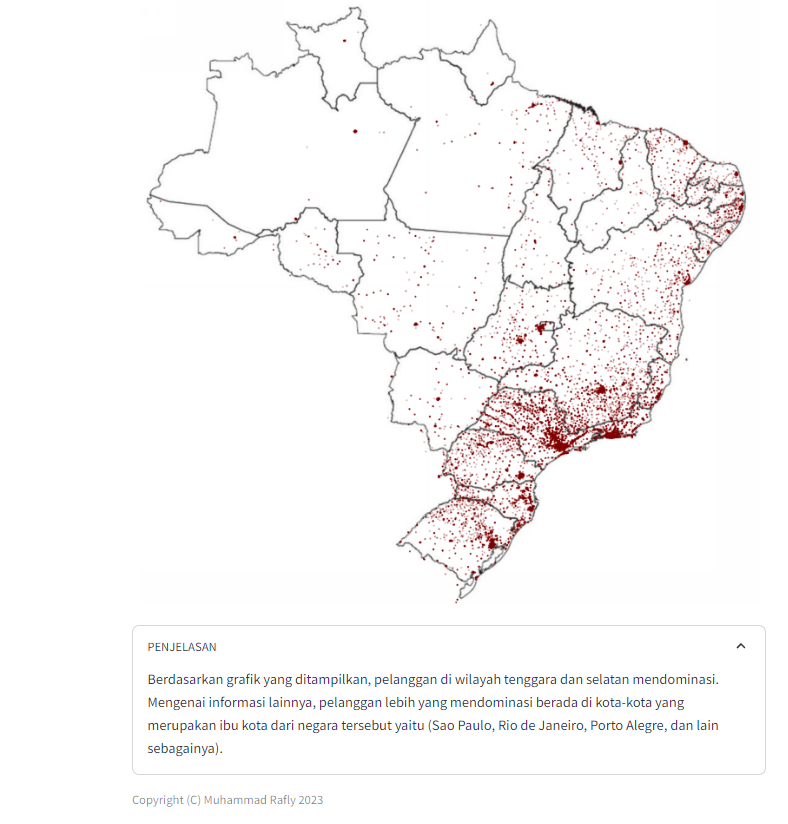

### Pertanyaan 2 :Berdasarkan dari data, Produk apa saja yang merupakan produk terlaris dan kurang laris ?

In [ ]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(45, 25))

sns.barplot(x="product_count", y="product_category_name_english", data=sum_order_items_df.head(5), palette="viridis", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("NOMOR PENJUALAN", fontsize=75)
ax[0].set_title("PRODUK TERLARIS", loc="center", fontsize=85)
ax[0].tick_params(axis ='y', labelsize=60)
ax[0].tick_params(axis ='x', labelsize=55)

sns.barplot(x="product_count", y="product_category_name_english", data=sum_order_items_df.sort_values(by="product_count", ascending=True).head(5), palette="viridis", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("NOMOR PENJUALAN", fontsize=75)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("PRODUK KURANG LARIS", loc="center", fontsize=85)
ax[1].tick_params(axis='y', labelsize=60)
ax[1].tick_params(axis='x', labelsize=55)

st.pyplot(fig)

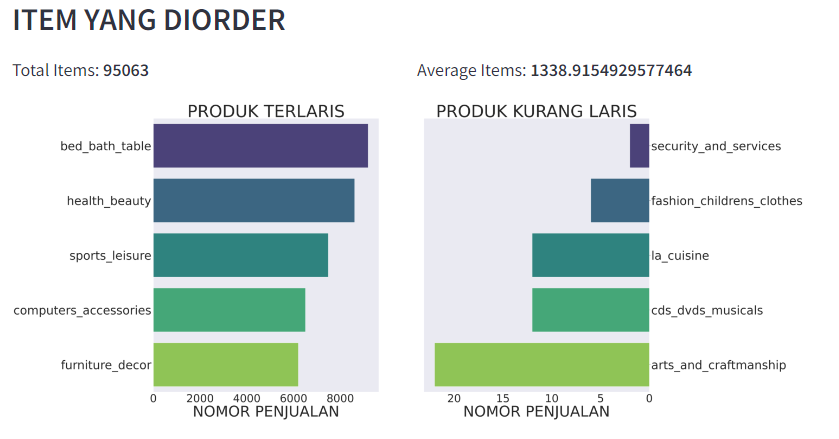

Dari grafik di atas dapat disimpulkan bahwa produk terlaris yaitu bed_bath_table dan produk kurang laris yaitu security_and_services

Pertanyaan 3 : Bagaimana tingkat kepuasan pelanggan dari berdasarkan dari data ?

In [ ]:
st.subheader("CEK NILAI")
col1,col2 = st.columns(2)

with col1:
    avg_review_score = review_score.mean()
    st.markdown(f"CEK NILAI RATA-RATA: **{avg_review_score}**")

with col2:
    most_common_review_score = review_score.value_counts().index[0]
    st.markdown(f"SKOR ULASAN PALING UMUM: **{most_common_review_score}**")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=review_score.index, 
            y=review_score.values, 
            order=review_score.index,
            palette=["#068DA9" if score == common_score else "#D3D3D3" for score in review_score.index]
            )

plt.title("NILAI RATING PELANGGAN UNTUK LAYANAN", fontsize=15)
plt.xlabel("RATING")
plt.ylabel("PERHITUNGAN")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


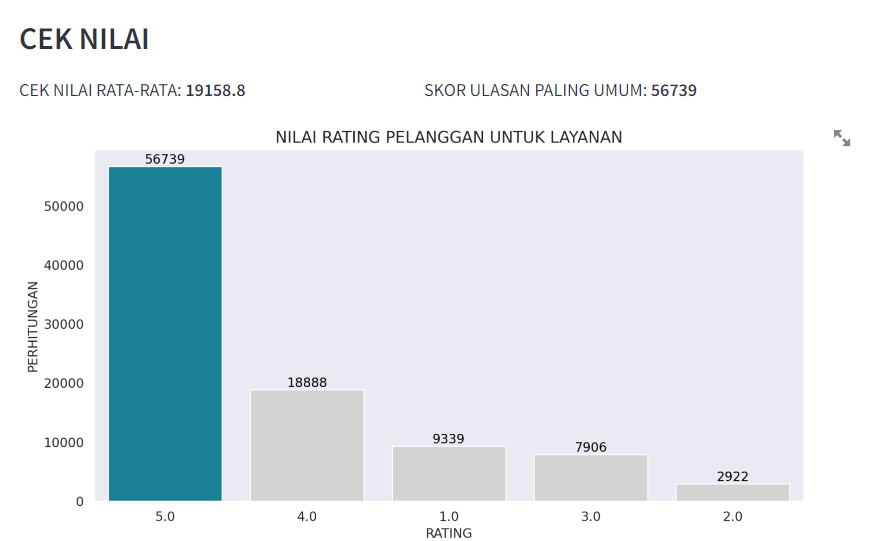

Pada grafik data diatas, pelanggan sangat puas dengan layanan yang disediakan, pelanggan yang memberikan rating 5 memiliki data terbanyak dibandingkan rating yang lainnya.

## Conclusion

1.  Berdasarkan Letak Geografis, dimana saja letak pelanggan terbanyak ?
>   Berdasarkan grafik yang ditampilkan, pelanggan di wilayah tenggara dan selatan mendominasi. Mengenai informasi lainnya, pelanggan lebih yang mendominasi berada di kota-kota yang merupakan ibu kota dari negara tersebut yaitu (Sao Paulo, Rio de Janeiro, Porto Alegre, dan lain sebagainya)
2.  Berdasarkan dari data, Produk apa saja yang merupakan produk terlaris dan kurang laris ?
>   Dari grafik yang ditampilkan dapat disimpulkan bahwa produk terlaris yaitu bed_bath_table dan produk kurang laris yaitu security_and_services
3.  Bagaimana tingkat kepuasan pelanggan dari berdasarkan dari data ?
>   Pada grafik yang telah ditampilkan, pelanggan sangat puas dengan layanan yang disediakan, pelanggan yang memberikan rating 5 memiliki data terbanyak dibandingkan rating yang lainnya.